In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from log_gabor.log_gabor import log_gabor


In [37]:
def plot_hist(image, title):
    hist_figure = plt.figure(title)
    plt.clf()
    plt.title(title)
    histogram = np.histogram(image.ravel(), bins=256, range=[0,256])
    plt.yscale('log')
    plt.plot(histogram[1][0:256], histogram[0])
    plt.xlim(0, 255)
    plt.ylim(1, histogram[0].max());
    plt.yscale('log')
    plt.draw()
    plt.show(block=False)
    
    return histogram

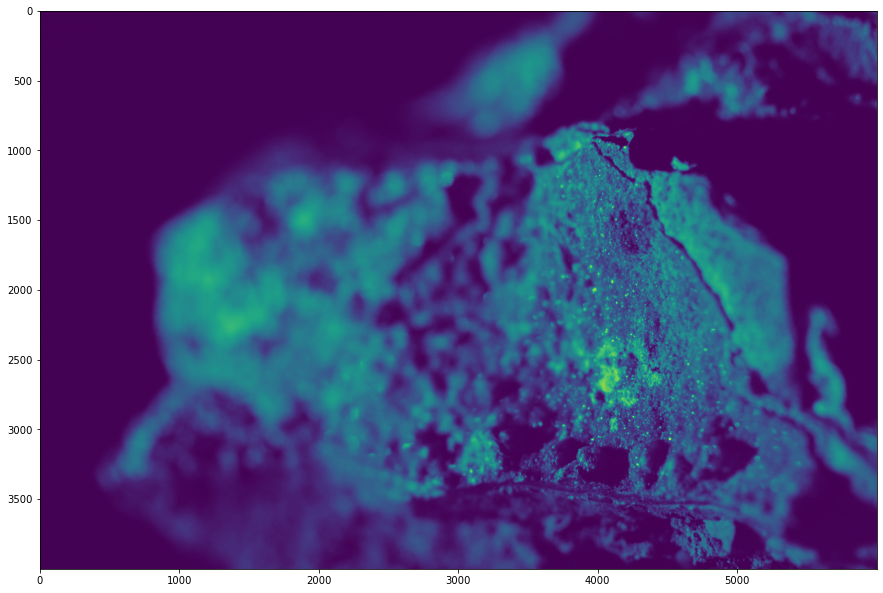

In [38]:
image = cv.imread('/Users/anthonyesposito/Pictures/macroni/Rosasite_w_Conacalcite/1/JPG/DSCF6931.jpg', cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.imshow(image)

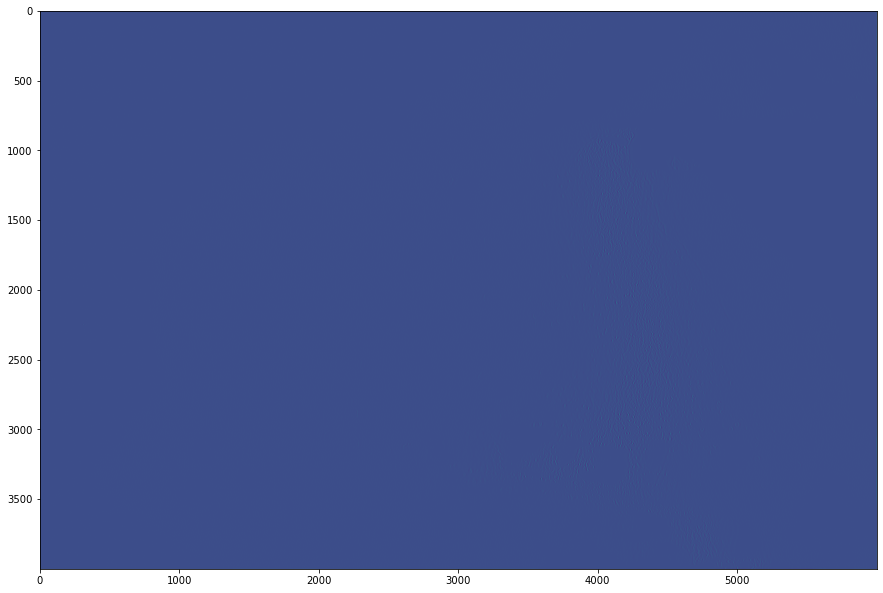

In [39]:
result, LG = log_gabor(image, 1500, .5, 0, 5)

plt.figure(figsize=(15,15))
plt.imshow(result)

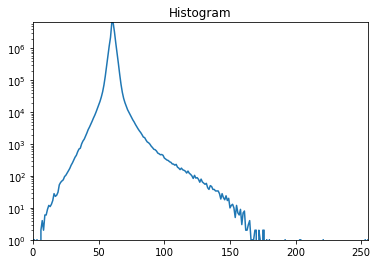

In [40]:
hist = plot_hist(result, 'Histogram')

In [41]:
hist[0]

array([      1,       1,       0,       1,       0,       0,       2,
             4,       2,       6,       6,       9,      12,      11,
            13,      17,      28,      23,      25,      31,      53,
            63,      70,      76,      96,     106,     124,     147,
           174,     218,     258,     316,     389,     448,     578,
           702,     746,    1018,    1249,    1434,    1782,    2233,
          2859,    3435,    4228,    5232,    6564,    8042,   10161,
         13128,   16597,   21924,   30065,   43727,   71554,  134065,
        279079,  594327, 1187979, 2225558, 6593793, 6419459, 3333898,
       1495840,  728445,  338433,  153798,   75005,   42211,   27360,
         19958,   15469,   12018,    9968,    8225,    6872,    5760,
          4955,    4135,    3526,    3009,    2611,    2306,    1980,
          1671,    1602,    1349,    1170,    1105,     999,     864,
           779,     690,     668,     610,     525,     499,     464,
           473,     

In [47]:
zeroed = np.where([hist[0] > 1000])[1]
zeroed

array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88])

In [48]:
for i in zeroed:
    result[result==i]=0

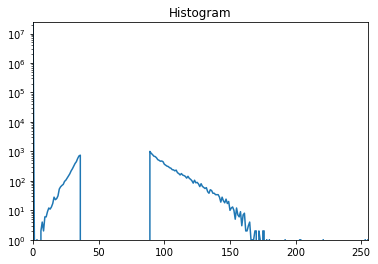

(array([23982172,        1,        0,        1,        0,        0,
               2,        4,        2,        6,        6,        9,
              12,       11,       13,       17,       28,       23,
              25,       31,       53,       63,       70,       76,
              96,      106,      124,      147,      174,      218,
             258,      316,      389,      448,      578,      702,
             746,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0, 

In [49]:
plot_hist(result, 'Histogram')

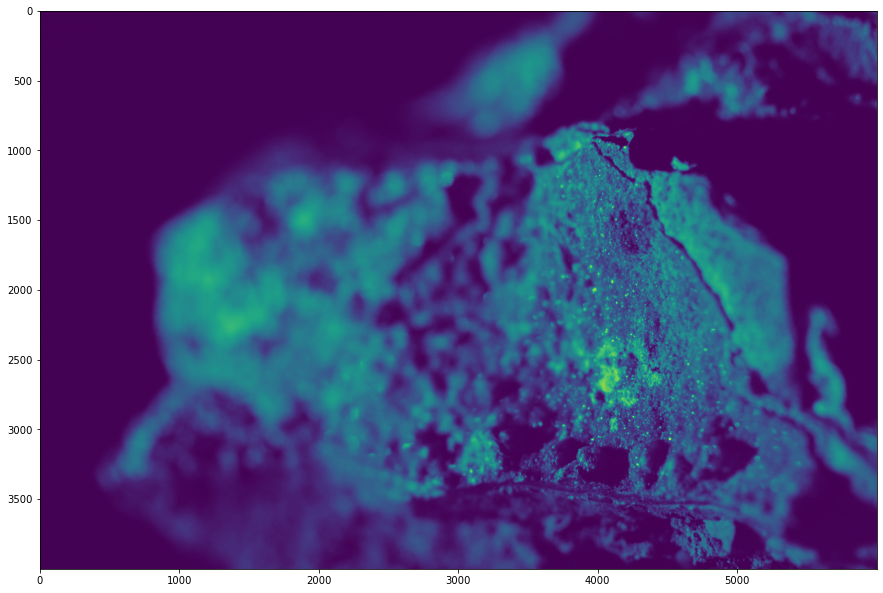

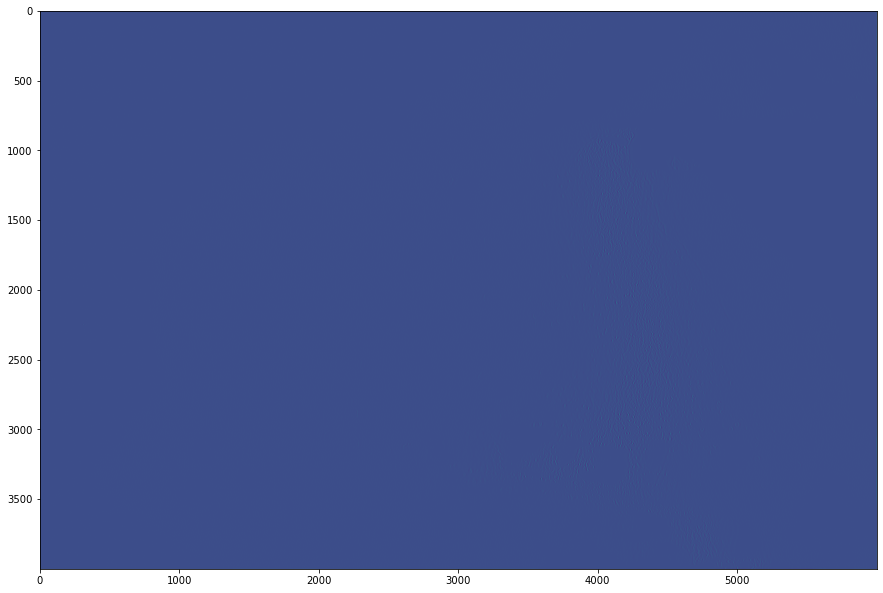

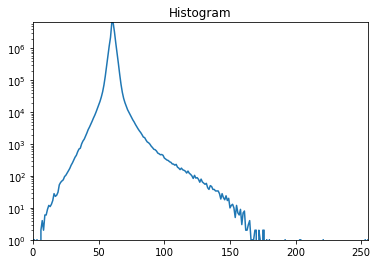

In [62]:
image = cv.imread('/Users/anthonyesposito/Pictures/macroni/Rosasite_w_Conacalcite/1/JPG/DSCF6931.jpg', cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(15,15))
plt.imshow(image)

result, LG = log_gabor(image, 1500, .5, 0, 5)

plt.figure(figsize=(15,15))
plt.imshow(result)

hist = plot_hist(result, 'Histogram')



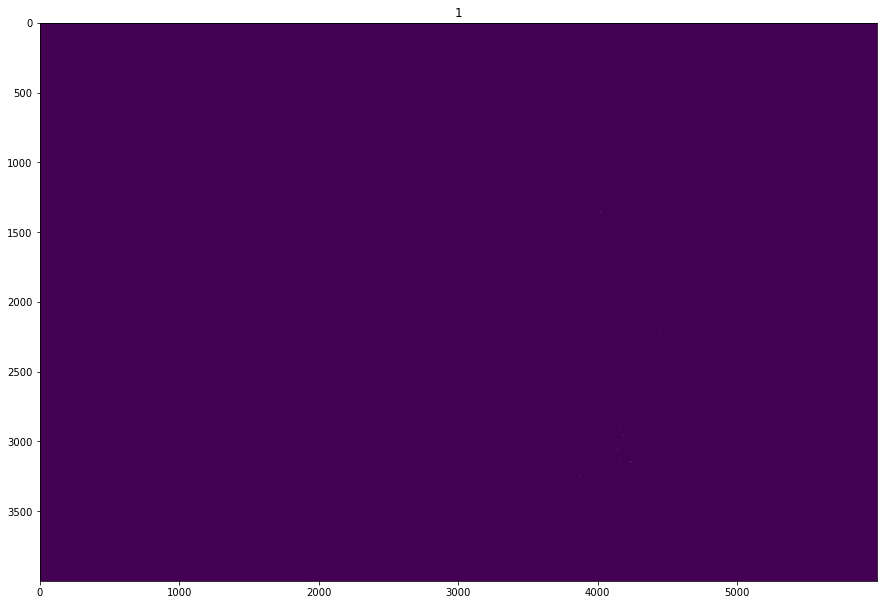

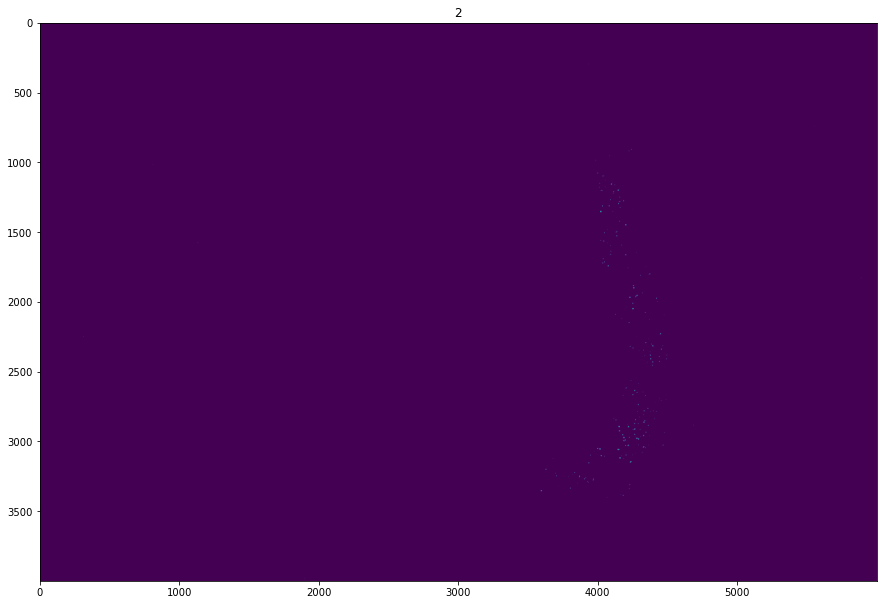

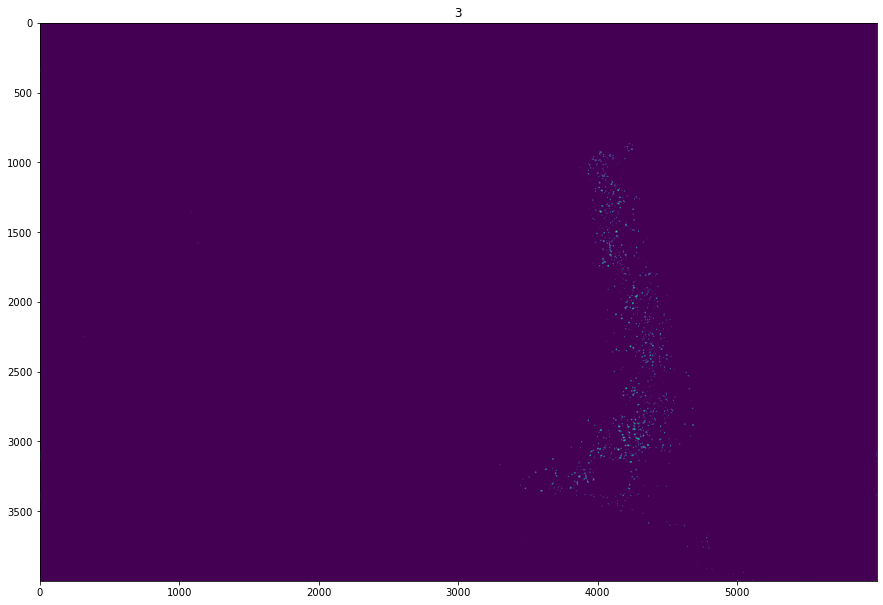

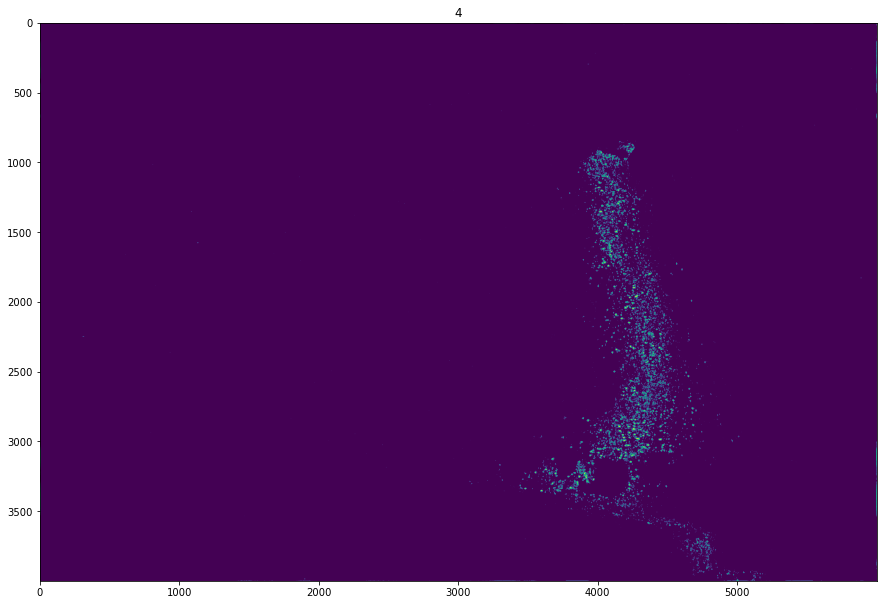

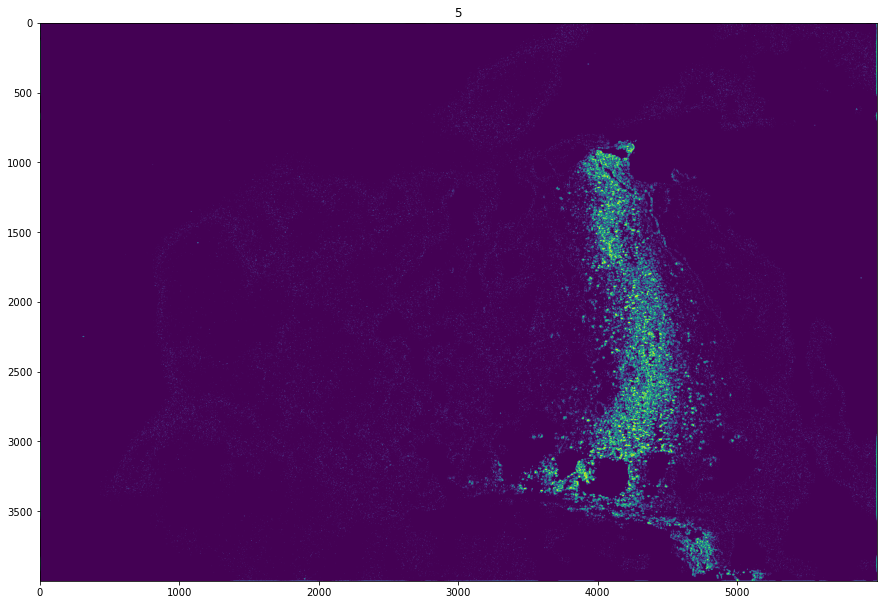

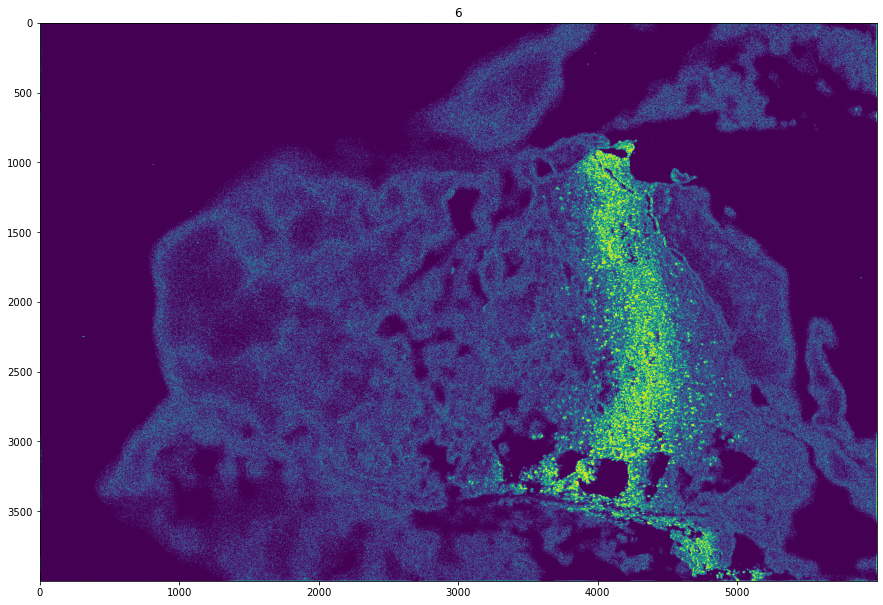

In [68]:
for i in range(1,7,1):
    
    result_copy = np.copy(result)
    
    zeroed = np.where([hist[0] > 10**i])[1]

    for j in zeroed:
        result_copy[result_copy==j]=0

    result_copy[result_copy>0] = 255


    plt.figure(figsize=(15,15))
    plt.title(str(i))
    plt.imshow(result_copy)